In [5]:
import numpy as np
from scipy import stats as sp
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [6]:
df = pd.read_csv('./../../data/GCP/budget.csv')
df.head()

,Year,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
0,1959,2.453378,1.810588,2.0352,0.852376,0.516073,0.860316
1,1960,2.568376,1.672592,1.5052,0.819017,1.394030,0.522722
2,1961,2.579724,1.607579,1.6536,0.714842,0.605098,1.213762
3,1962,2.685099,1.566764,1.1872,0.756709,1.348349,0.959605
4,1963,2.832715,1.513809,1.2084,0.904997,0.877794,1.355333


In [7]:
year = df['Year']
ffi = df['fossil fuel and industry']
lce = df['land-use change emissions']
atmg = df['atmospheric growth']
os = df['ocean sink']
ls = df['land sink']
imb = df['budget imbalance']

## Linear regression

LinregressResult(slope=0.028848748934793, intercept=-55.617384315289215, rvalue=0.9723348177059217, pvalue=2.5155486768877195e-38, stderr=0.0009100269182552654)

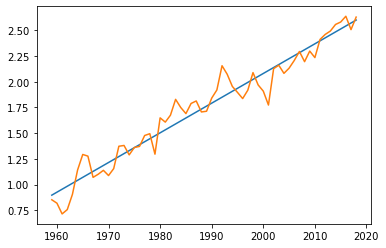

In [8]:
# Ocean sink
var = os
lin = sp.linregress(year, var)
plt.plot(year,lin[0]*year+lin[1])
plt.plot(year, var)
lin

LinregressResult(slope=0.03741403899367602, intercept=-72.22240412503477, rvalue=0.6003000816166719, pvalue=3.9817649123897215e-07, stderr=0.006545155045573297)

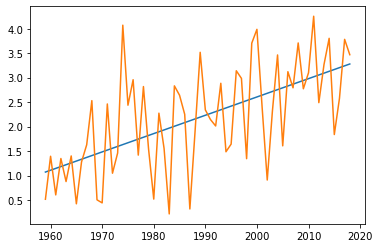

In [9]:
# Land sink
var = ls
lin = sp.linregress(year, var)
plt.plot(year,lin[0]*year+lin[1])
plt.plot(year, var)
lin

LinregressResult(slope=0.0008711864409214123, intercept=-1.288711932211521, rvalue=0.11360449767113627, pvalue=0.3874405647045156, stderr=0.0010004164977547771)

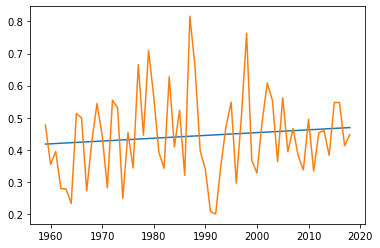

In [10]:
# Airborne fraction
airborne = atmg/(ffi+lce)
var = airborne
lin = sp.linregress(year, var)
plt.plot(year,lin[0]*year+lin[1])
plt.plot(year, var)
lin

LinregressResult(slope=0.058478610725201434, intercept=-112.99467076039639, rvalue=0.7342969338756834, pvalue=2.4466744148322374e-11, stderr=0.007098577793891021)

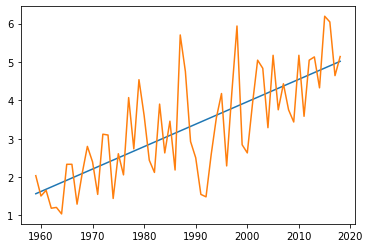

In [11]:
# Atm-growth
var = atmg
lin = sp.linregress(year, var)
plt.plot(year,lin[0]*year+lin[1])
plt.plot(year, var)
lin

LinregressResult(slope=0.1222958328555766, intercept=-237.16511755642074, rvalue=0.9847265030372965, pvalue=9.825348962829596e-46, stderr=0.002839236774610634)

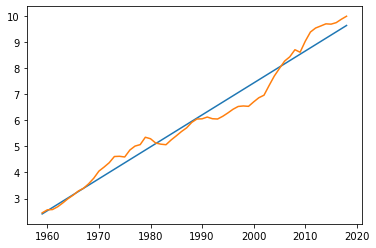

In [12]:
# Fossil-fuel emissions
var = ffi
lin = sp.linregress(year, var)
plt.plot(year,lin[0]*year+lin[1])
plt.plot(year, var)
lin

LinregressResult(slope=0.00026035717035287554, intercept=0.8138675569399738, rvalue=0.02552227222455985, pvalue=0.8465145930305129, stderr=0.0013390435953568925)

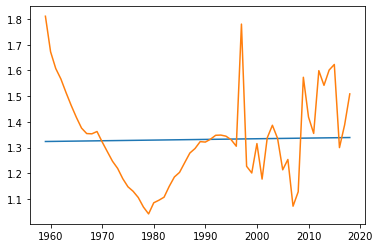

In [13]:
# Land-use change emissions
var = lce
lin = sp.linregress(year, var)
plt.plot(year,lin[0]*year+lin[1])
plt.plot(year, var)
lin

## Correlation between SOI and CO2 growth rate

In [16]:
soi_df = pd.read_csv('./../../data/climate_indices/soi_noaa.csv')

In [17]:
# Fix date column

date_new = []
for date in soi_df['Date']:
    date_new.append(int(str(date)[:4])+(int(str(date)[-2:])-1)/12)

soi_df.Date = date_new
soi_df.head()

,Date,Value
0,1951.000000,1.5
1,1951.083333,0.9
2,1951.166667,-0.1
3,1951.250000,-0.3
4,1951.333333,-0.7


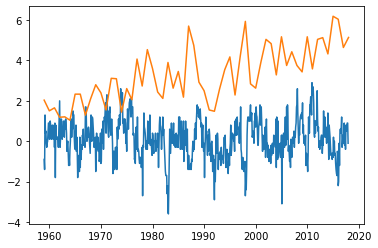

In [18]:
plt.plot(soi_df.Date[96:804], soi_df.Value[96:804])
plt.plot(year, atmg)

### Correlation between SOI index and atmospheric growth.

In [19]:
# Calculate annual mean of SOI
SOI_floor_date = np.floor(soi_df.Date)

SOI_year = []
SOI_annual_values = []
for year in range(int(np.min(SOI_floor_date)),
                  int(np.max(SOI_floor_date))
                 ):
    data_year_soi = np.mean(soi_df.Value[SOI_floor_date==year])
    SOI_year.append(year)
    SOI_annual_values.append(data_year_soi)

SOI_annual_ave = (pd
                  .DataFrame([SOI_year, SOI_annual_values],
                             index = ['Year', 'SOI']
                            )
                  .transpose()
                 )

In [20]:
np.corrcoef(SOI_annual_ave.iloc[8:-1,1], atmg)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 59 and the array at index 1 has size 60

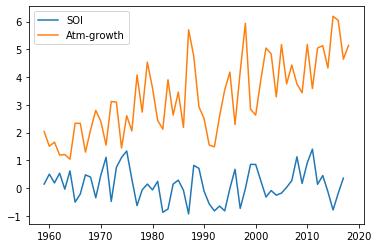

In [21]:
plt.plot(range(1959,2018), SOI_annual_ave.iloc[8:-1,1])
plt.plot(df.Year, atmg)
labels=['SOI', 'Atm-growth']
plt.legend(labels)